In [7]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

path = os.getcwd()
data = pd.read_csv('C:\\Users\\Orly\\PycharmProjects\\sleek_HW'+'\\data_all.csv', index_col=None, header=0)

data.shape
data.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

I first load the data. Next I will look at the data and some statistics:

In [8]:
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,type
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Friday_DDOS
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Friday_DDOS
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Friday_DDOS
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Friday_DDOS
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Friday_DDOS


In [9]:
data.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Destination Port,2830743.0,8071.0,18284.0,0.0,53.0,80.0,443.0,65535.0
Flow Duration,2830743.0,14785664.0,33653744.0,-13.0,155.0,31316.0,3204828.0,119999998.0
Total Fwd Packets,2830743.0,9.0,750.0,1.0,2.0,2.0,5.0,219759.0
Total Backward Packets,2830743.0,10.0,997.0,0.0,1.0,2.0,4.0,291922.0
Total Length of Fwd Packets,2830743.0,549.0,9994.0,0.0,12.0,62.0,187.0,12900000.0
...,...,...,...,...,...,...,...,...
Active Min,2830743.0,58296.0,577092.0,0.0,0.0,0.0,0.0,110000000.0
Idle Mean,2830743.0,8316037.0,23630079.0,0.0,0.0,0.0,0.0,120000000.0
Idle Std,2830743.0,503844.0,4602984.0,0.0,0.0,0.0,0.0,76900000.0
Idle Max,2830743.0,8695752.0,24366888.0,0.0,0.0,0.0,0.0,120000000.0


now 

it seems that there are many columns which are only zeros. that is no informative at all. so I remove those columns.

In [10]:
col_remove = []
for i in range(0,data.shape[1]):
    if (data.iloc[:,i] == 0).all():
        col_remove.append(data.columns[i])
        
data = data.drop(col_remove, axis=1)
data = data.drop_duplicates()
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.dropna()
data.shape

(2572640, 72)

next we need to understand what is the ration of each class we have. as we can see from the graph below, we have many samples from benign class. this means we have a case of imbalanced dataset.

In [11]:

class_counts = data[' Label'].value_counts()
print(class_counts)

 Label
BENIGN                        2146899
DoS Hulk                       172846
DDoS                           128014
PortScan                        90694
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1948
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


next

next

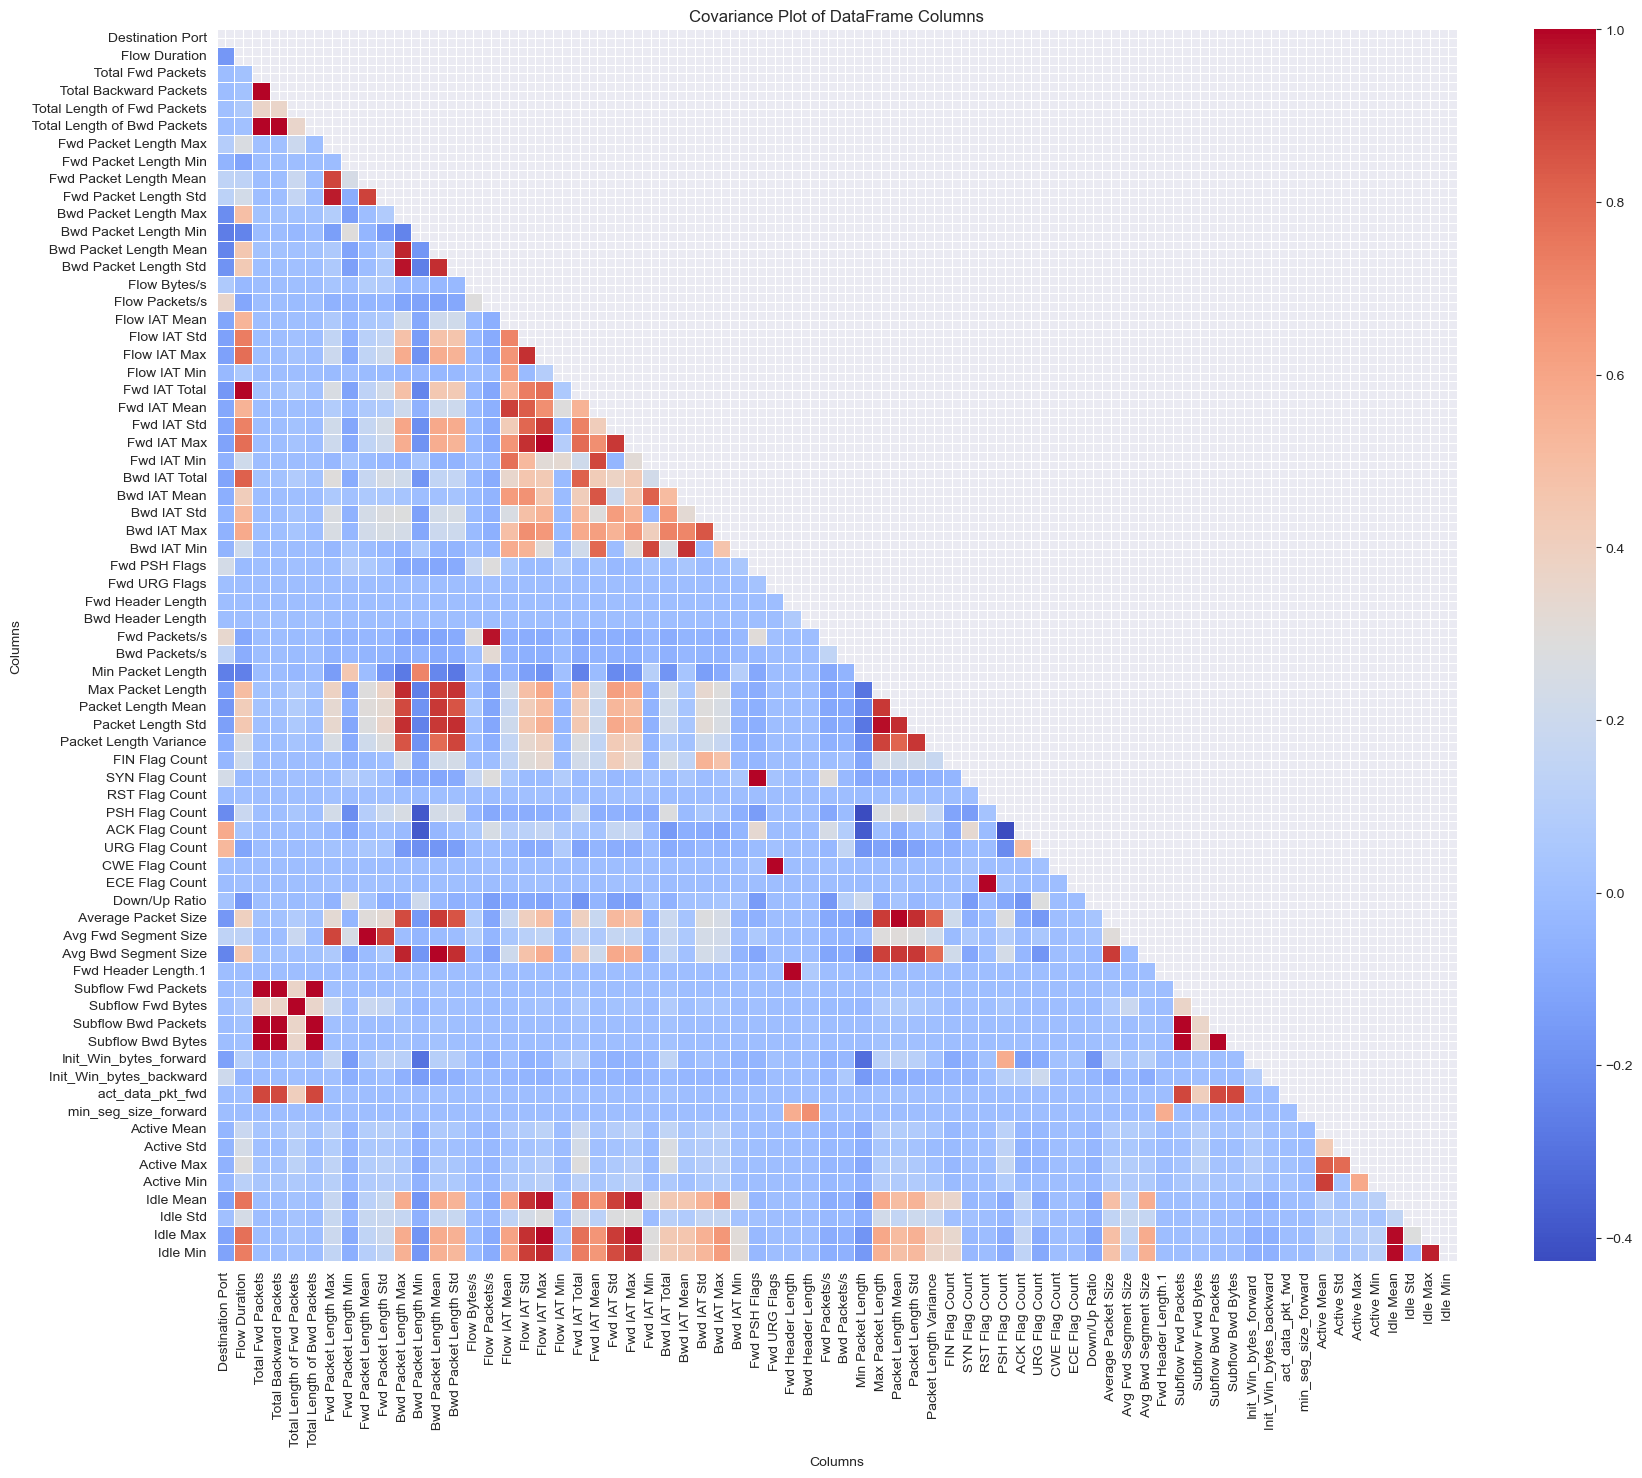

In [12]:
#Correlation matrix
correlation_matrix = data.drop([' Label','type'],axis =1 ).corr()

# Mask the diagonal values to hide them
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap plot of the covariance matrix
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=.5, mask=mask, )
plt.title('Covariance Plot of DataFrame Columns')
plt.xlabel('Columns')
plt.ylabel('Columns')
plt.show()

next we would like to remove columns which have very high correlation since the information of those is now new and we can remove it.

In [13]:
d= []
for row in range(correlation_matrix.shape[0]):
    for col in range(correlation_matrix.shape[1]):
        if row != col:
            if correlation_matrix.iloc[row,col] >= 0.99:
                d.append({'column1':data.columns[row],  'column2':data.columns[col]})

df_columns_high_cor = pd.DataFrame(d)
column_remove = df_columns_high_cor['column1'].tolist()
print(df_columns_high_cor)


                         column1                       column2
0                  Flow Duration                 Fwd IAT Total
1              Total Fwd Packets        Total Backward Packets
2              Total Fwd Packets   Total Length of Bwd Packets
3              Total Fwd Packets           Subflow Fwd Packets
4              Total Fwd Packets           Subflow Bwd Packets
5              Total Fwd Packets             Subflow Bwd Bytes
6         Total Backward Packets             Total Fwd Packets
7         Total Backward Packets   Total Length of Bwd Packets
8         Total Backward Packets           Subflow Fwd Packets
9         Total Backward Packets           Subflow Bwd Packets
10        Total Backward Packets             Subflow Bwd Bytes
11   Total Length of Fwd Packets             Subflow Fwd Bytes
12   Total Length of Bwd Packets             Total Fwd Packets
13   Total Length of Bwd Packets        Total Backward Packets
14   Total Length of Bwd Packets           Subflow Fwd 

In [14]:
data.drop(column_remove, axis=1, inplace=True)
print(data.shape)

(2572640, 43)


ceate a classifier that will decide if a sample is a malware or not. for that I will use the isolation forest since:

In [15]:
from sklearn.model_selection import train_test_split

X = data.drop([' Label','type'],axis =1)
#X.columns = X.columns.str.replace('/', '_') 

y = data[' Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
y_train_clf = [0 if x == 'BENIGN' else 1 for x in y_train]

lets view the data. using PCA to get a grasp of the data and the ability to separate BENIGN and malicious by performing PCA we can see that now much is explained with PCA components. the reason for that is probably due to the sparse data we have. therefore I will use the SVD Truncated method.

[0.18626351 0.11635345 0.07740164 0.07517114 0.05429601]


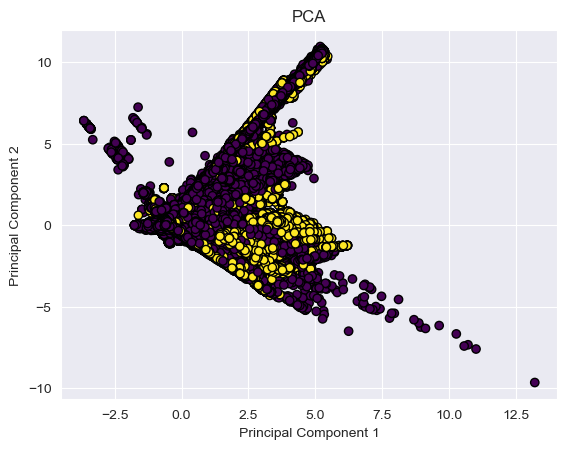

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=5, whiten=True))])
X_pca = pipeline.fit_transform(X_train)
print(pipeline['pca'].explained_variance_ratio_)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_clf, cmap='viridis', edgecolor='k')
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Here we can see that the truncated SVD method has managed to capture better understanding of the data variance. therefore I will use it to transform the data and use it as input run my classifier

[0.49197039 0.2783752  0.11448718 0.05983836 0.02950966]


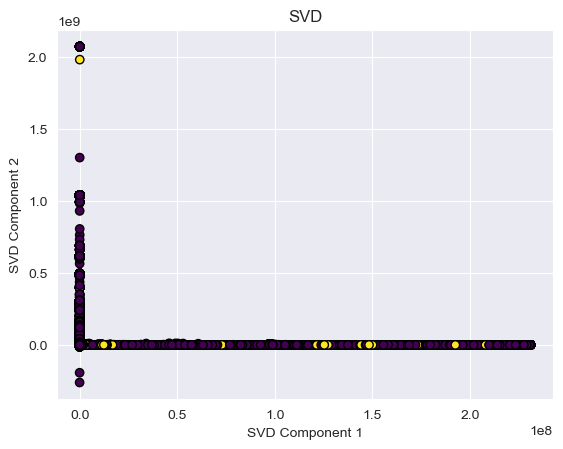

In [17]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
X_reduced = svd.fit_transform(X_train)
print(svd.explained_variance_ratio_)

# Plot the results
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train_clf, cmap='viridis', edgecolor='k')
plt.title('SVD')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.show()

['Bwd IAT Total', ' Bwd IAT Max', ' Fwd IAT Mean', ' Bwd IAT Mean', ' Flow IAT Std', ' Fwd IAT Std', ' Bwd IAT Std', ' Bwd IAT Min', ' Fwd IAT Min', ' Flow IAT Mean']
41


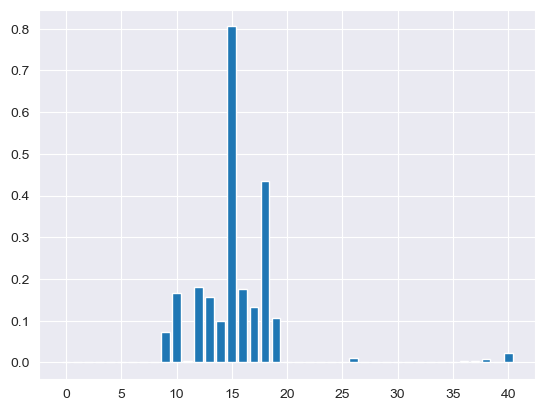

Index([' Destination Port', ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Min',
       ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Min', 'Bwd IAT Total',
       ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Std',
       ' Packet Length Variance', 'FIN Flag Count', ' PSH Flag Count',
       ' ACK Flag Count', ' URG Flag Count', ' Down/Up Ratio',
       'Init_Win_bytes_forward', ' Init_Win_bytes_backward',
       ' act_data_pkt_fwd', ' min_seg_size_forward', 'Active Mean',
       ' Active Std', ' Active Max', ' Active Min', ' Idle Std'],
      dtype='object')
<class 'str'>
Index(['Bwd IAT Total', ' Bwd IAT Max', ' Fwd IAT Mean', ' Bwd

In [18]:

best_features = [X_train.columns[i] for i in svd.components_[0].argsort()[::-1]]
print(best_features[:10])

import matplotlib.pyplot as plt
print(len(svd.components_[0]))
plt.bar(np.arange(len(svd.components_[0])),svd.components_[0])
plt.show()
print(X_train.columns)
print(type(best_features[:10][0]))
X_xgb = X_train[['Bwd IAT Total', ' Bwd IAT Max', ' Fwd IAT Mean', ' Bwd IAT Mean', ' Flow IAT Std', ' Fwd IAT Std', ' Bwd IAT Std', ' Bwd IAT Min', ' Fwd IAT Min', ' Flow IAT Mean']]
print(X_xgb.columns)
print(X_xgb.shape)

I will use xgboost for classification

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


model = xgb.XGBClassifier()

pipeline = Pipeline([
        ('model', model)
    ])

param_grid = {
        'model__max_depth': [20],
        'model__n_estimators': [300]
    }

grid = GridSearchCV(pipeline, param_grid, cv=10, n_jobs=-1)
grid.fit(X_train, y_train_clf)

mean_score = grid.cv_results_["mean_test_score"][grid.best_index_]
std_score = grid.cv_results_["std_test_score"][grid.best_index_]

print(f"Best parameters: {grid.best_params_}")
print(f"Mean CV score: {mean_score: .6f}")
print(f"Standard deviation of CV score: {std_score: .6f}")

we can see there a great accurecy score for the validation set in the cross validation data. let's review feature importance

In [ ]:
selected_model = grid.best_estimator_
feature_important = selected_model['model'].get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10))

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import TruncatedSVD


t_svd = TruncatedSVD(random_state=123)
clf = IsolationForest(random_state=0)
pipeline = Pipeline([('t_svd',t_svd),
        ('clf', clf)])

param_grid = {
        "t_svd__n_components": [20],
        'clf__max_features': [20],
        'clf__max_samples': [500],
        'clf__contamination':[0.2]
}
    
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring="balanced_accuracy")
grid.fit(X_train.values, y_train_clf)

mean_score = grid.cv_results_["mean_test_score"][grid.best_index_]
std_score = grid.cv_results_["std_test_score"][grid.best_index_]

print(f"Best parameters: {grid.best_params_}")
print(f"Mean CV score: {mean_score: .6f}")
print(f"Standard deviation of CV score: {std_score: .6f}")